<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/K-NearestNeighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

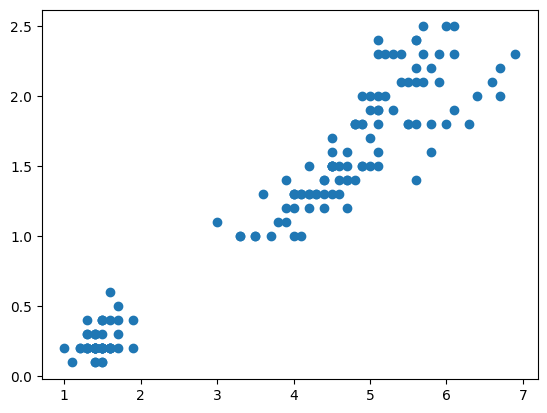

[np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(0)]
0.9666666666666667


In [84]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def eucledian_distance(x1, x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  # ipdb.set_trace()
  return distance

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    # ipdb.set_trace()
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    import ipdb
    # ipdb.set_trace()
    #compute the distance
    distance = [eucledian_distance(x, x_train) for x_train in self.X_train]
    # print('distance', distance)
    #find the closest k
    k_indices = np.argsort(distance)[:self.k]
    # print('k indices', k_indices)
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    # print('k_nearest_labels', k_nearest_labels)
    #majority vote
    most_common = Counter(k_nearest_labels).most_common()
    # print('most common', most_common)
    # ipdb.set_trace()
    return most_common[0][0]



iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

plt.figure()
plt.scatter(X[:,2],X[:,3])
plt.show()

clf = KNN(5)
clf.fit(X_train, y_train)
predictons = clf.predict(X_test)
print(predictons)
accuracy = np.sum(predictons == y_test) / len(y_test)
print(accuracy)

In [83]:
import numpy as np
from collections import Counter

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        # import ipdb
        # ipdb.set_trace()
        distances.append((dist, training_labels[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    # import ipdb
    # ipdb.set_trace()
    return Counter(k_nearest_labels).most_common(1)[0][0]

training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A
